## 판다스 피봇

In [1]:
import pandas as pd
df2 = pd.DataFrame({'날짜': ['01-06','01-06','01-06','01-07','01-07','01-07','01-08','01-08','01-08'],
                    '제목': ['밤편지', '아로하', 'Dynamite', '밤편지', '한숨', 'Dynamite','마리아','한숨','밤편지'],
                    '순위': [1, 2, 3, 1, 2, 3,1,2,3]})
df2

,날짜,제목,순위
0,01-06,밤편지,1
1,01-06,아로하,2
2,01-06,Dynamite,3
3,01-07,밤편지,1
4,01-07,한숨,2
5,01-07,Dynamite,3
6,01-08,마리아,1
7,01-08,한숨,2
8,01-08,밤편지,3


In [2]:
piv = df2.pivot(index='날짜', columns='제목', values='순위')

In [3]:
piv.columns

Index(['Dynamite', '마리아', '밤편지', '아로하', '한숨'], dtype='object', name='제목')

## 분석 파일 로드

In [4]:
music_df = pd.read_csv(f'./1.crawling[벅스뮤직날짜별순위].ipynb 20230415 - 20230723.csv')


In [5]:
music_df.columns

Index(['날짜', '순위', '제목', '가수'], dtype='object')

In [6]:
music_df.info()
# 4개의 columns, 각각의 개수와 타입들이 나와있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      10000 non-null  object
 1   순위      10000 non-null  int64 
 2   제목      10000 non-null  object
 3   가수      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [22]:
music_df['순위'] = music_df['순위'].astype('int64')

In [27]:
music_pivot = pd.pivot_table(music_df,index='날짜',columns='제목',values='순위')

In [28]:
music_pivot.head(10)


제목,#menow,'Til We Meet Again,10X,1994년 어느 늦은 밤,990 (Feat. 김심야),ANTIFRAGILE,ASAP,AURORA,After LIKE,All Night,...,한 페이지가 될 수 있게,한강에서 (Feat. BIG Naughty),해금,해요 (2022),헤어지자 말해요,헤어질 결심,혼자라고 생각말기,황금가면,후유증 (Can We Go Back),희재
날짜,,,,,,,,,,,,,,,,,,,,,
2023-04-15,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,15.0,NaN,...,22.0,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,17.0,NaN,...,24.0,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,19.0,NaN,...,28.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,26.0,NaN
2023-04-18,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,17.0,NaN,...,26.0,NaN,NaN,67.0,NaN,NaN,NaN,NaN,71.0,NaN
2023-04-19,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,16.0,NaN,...,24.0,NaN,NaN,65.0,NaN,NaN,NaN,NaN,100.0,NaN
2023-04-20,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,15.0,NaN,...,26.0,NaN,NaN,64.0,67.0,NaN,NaN,NaN,NaN,NaN
2023-04-21,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,15.0,NaN,...,22.0,NaN,97.0,65.0,59.0,NaN,NaN,NaN,NaN,NaN
2023-04-22,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,15.0,NaN,...,24.0,NaN,NaN,66.0,55.0,NaN,NaN,NaN,NaN,NaN
2023-04-23,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,16.0,NaN,...,23.0,NaN,NaN,63.0,33.0,NaN,NaN,NaN,NaN,NaN


In [10]:
len(music_pivot.columns)   # 100일간 순위에 진입했던 곡제목 개수

298

In [11]:
music_pivot['ANTIFRAGILE']

날짜
2023-04-15    18.0
2023-04-16    20.0
2023-04-17    21.0
2023-04-18    20.0
2023-04-19    18.0
              ... 
2023-07-19    35.0
2023-07-20    32.0
2023-07-21    36.0
2023-07-22    35.0
2023-07-23    37.0
Name: ANTIFRAGILE, Length: 100, dtype: float64

In [12]:
music_pivot['After LIKE']

날짜
2023-04-15    15.0
2023-04-16    17.0
2023-04-17    19.0
2023-04-18    17.0
2023-04-19    16.0
              ... 
2023-07-19    19.0
2023-07-20    18.0
2023-07-21    20.0
2023-07-22    20.0
2023-07-23    21.0
Name: After LIKE, Length: 100, dtype: float64

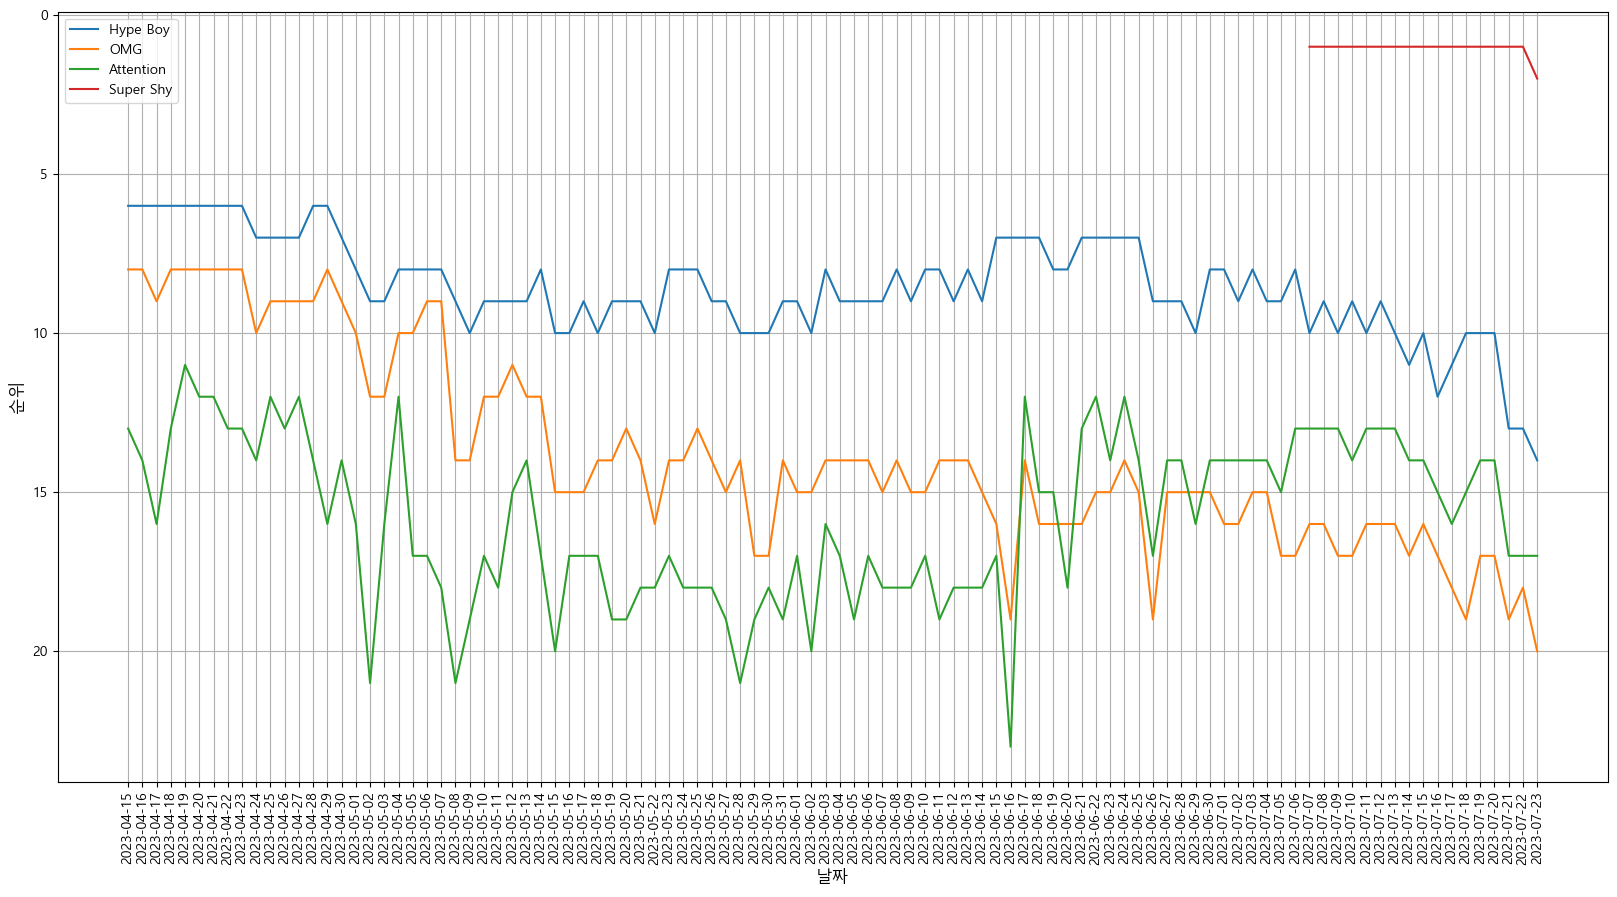

In [16]:
#알아보고 싶은 곡명을 넣으세요.
target_col = ['Hype Boy','OMG','Attention','Super Shy']


##############시각화단계############################################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 파일 경로 지시

plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(20,10))
#plt.plot(target_col)

plt.plot(music_pivot[target_col])

plt.legend(target_col, loc='best')
plt.gca().invert_yaxis() # y축 값 뒤집기
plt.xticks(rotation=90) # x 축 텍스트 90도 돌림
plt.xlabel("날짜", fontsize=12)     # x축 정보 표시
plt.ylabel("순위", fontsize=12)     # y축 정보 표시
plt.grid()
plt.show()

위 차트는 금년도 4월 15일 ~ 7월 23일까지의 음원사이트 '벅스'의 해당 4곡의 음원순위를 보여주고 있다. 그 중  보면 비교적 최근에 발매된 Super Shy를 제외한 3곡은 발매시점부터 지금까지 5위 ~ 20위 순위를 보여주고 있으며 특히 Hype Boy는 높은 순위를 보여주고 있다. 또한 Super Shy는 발매 하자마자 최상위권의 순위를 보인다.

## 관심 가수 순위 분석(브랜드 가치)
## 섭외 가수는 20위 안에서 100일 동안 안정적인 추세를 보이는 가수를 섭외하려고 한다.
## 그 인물은?

In [50]:
singer_pivot = pd.pivot_table(music_df,index='날짜',columns='가수',values='순위')

In [51]:
singer_pivot.head(3)

가수,#안녕,(여자)아이들,10CM,ASH ISLAND,ATEEZ(에이티즈),Agust D,Anne-Marie(앤 마리),BE'O (비오),BIG Naughty (서동현),BIGBANG (빅뱅),...,탑현,태양,태연 (TAEYEON),테이(Tei),폴킴(Paul Kim),프로미스나인,하이포(HIGH4),허각,효린,후이 (펜타곤)
날짜,,,,,,,,,,,,,,,,,,,,,
2023-04-15,59.0,42.0,52.0,NaN,NaN,50.0,70.0,79.5,61.0,65.0,...,NaN,29.0,82.0,42.0,52.0,NaN,91.0,NaN,NaN,NaN
2023-04-16,63.0,47.0,58.0,NaN,NaN,42.0,74.0,84.0,64.5,81.0,...,NaN,30.0,85.0,52.0,62.0,NaN,93.0,NaN,NaN,NaN
2023-04-17,68.0,54.5,66.0,NaN,NaN,44.0,55.0,86.0,74.5,90.0,...,NaN,38.0,94.0,64.0,62.0,NaN,NaN,NaN,NaN,NaN


In [54]:
singer_pivot.columns.to_list()

['#안녕',
 '(여자)아이들',
 '10CM',
 'ASH ISLAND',
 'ATEEZ(에이티즈)',
 'Agust D',
 'Anne-Marie(앤 마리)',
 "BE'O (비오)",
 'BIG Naughty (서동현)',
 'BIGBANG (빅뱅)',
 'BLACKPINK',
 'Bruno Mars(브루노 마스)',
 'Charlie Puth(찰리 푸스)',
 'Christopher(크리스토퍼)',
 'Crush',
 'DAY6 (데이식스)',
 'DK(디셈버)',
 'Dua Lipa(두아 리파)',
 'E SENS',
 'ENHYPEN',
 'EXO',
 'FIFTY FIFTY',
 'H1-KEY (하이키)',
 'IVE (아이브)',
 'Justin Bieber(저스틴 비버)',
 'LE SSERAFIM (르세라핌)',
 'Lauv(라우브)',
 'Meghan Trainor(메간 트레이너)',
 'NCT DREAM',
 'NCT 도재정',
 'NMIXX',
 'NewJeans',
 'PLAVE',
 'Paul Blanco',
 'Red Velvet (레드벨벳)',
 'SECRET NUMBER (시크릿넘버)',
 'SHINee (샤이니)',
 'STAYC(스테이씨)',
 'Sam Smith(샘 스미스)',
 'Say Yes!',
 'Stray Kids (스트레이 키즈)',
 'TOIL',
 'TWICE (트와이스)',
 'Taylor Swift(테일러 스위프트)',
 'Teddy Swims',
 'The Kid LAROI',
 'V.O.S.',
 'WSG워너비 (가야G)',
 'WSG워너비(4FIRE)',
 'XIA(준수)',
 'YENA (최예나)',
 'ZEROBASEONE (제로베이스원)',
 'aespa',
 'tripleS (트리플에스)',
 '강다니엘(KANG DANIEL)',
 '강민경',
 '거미',
 '경서',
 '경서예지',
 '권은비',
 '김동률',
 '김민석 (멜로망스)',
 '노을',
 '다비치',
 '던 (DAWN)',
 

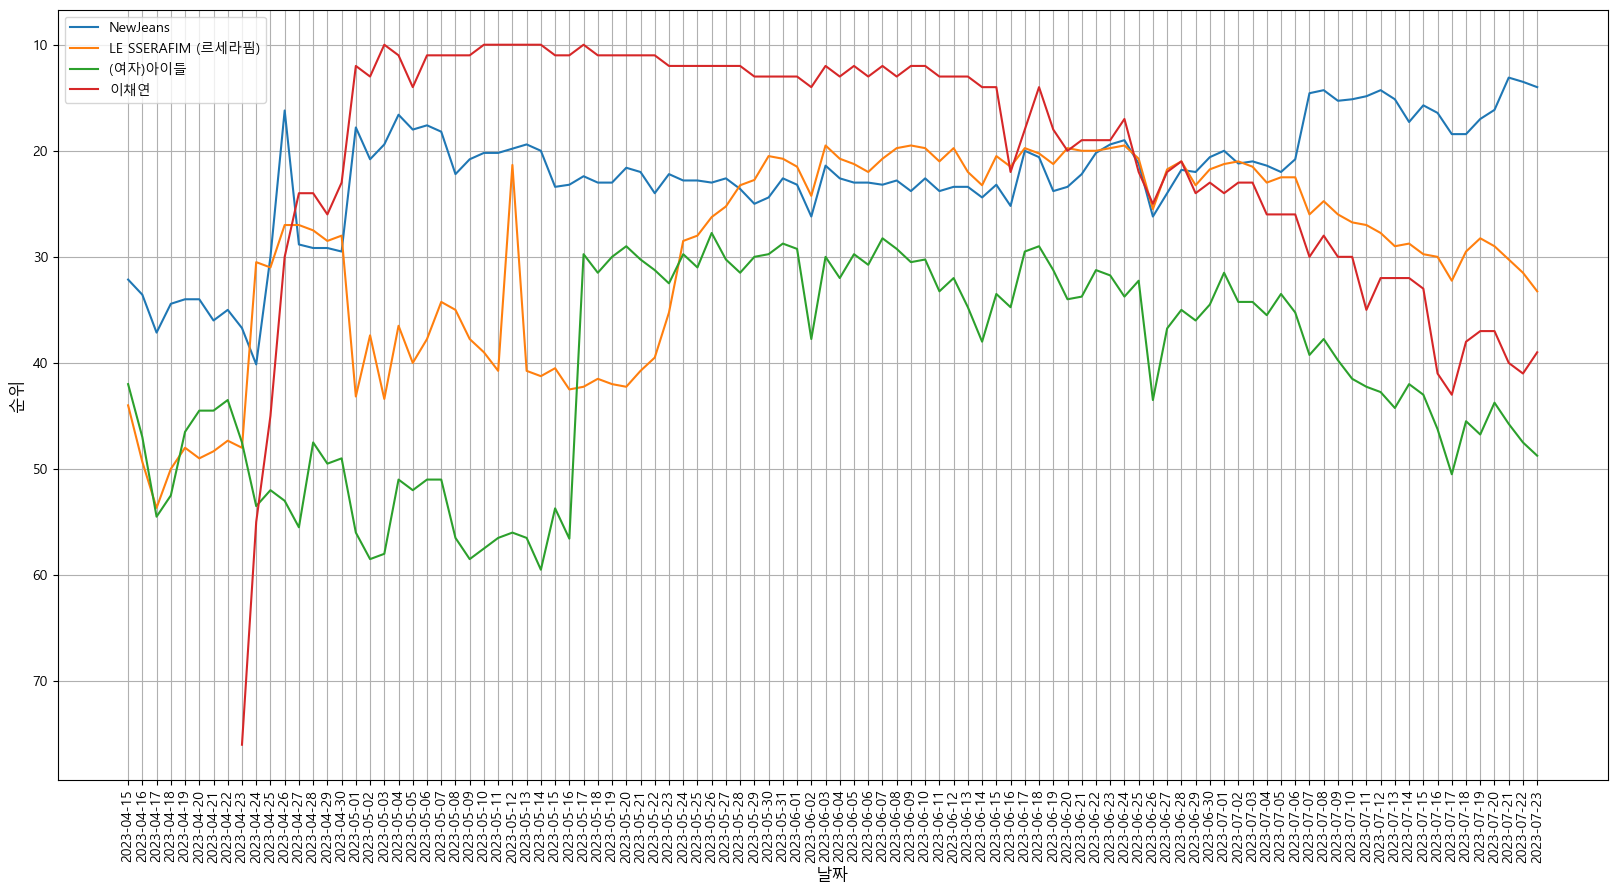

In [56]:
#알아보고 싶은 가수를 넣으세요.
target_col = ['NewJeans','LE SSERAFIM (르세라핌)','(여자)아이들','이채연']


##############시각화단계############################################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 파일 경로 지시

plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(20,10))
#plt.plot(target_col)

plt.plot(singer_pivot[target_col])

plt.legend(target_col, loc='best')
plt.gca().invert_yaxis() # y축 값 뒤집기
plt.xticks(rotation=90) # x 축 텍스트 90도 돌림
plt.xlabel("날짜", fontsize=12)     # x축 정보 표시
plt.ylabel("순위", fontsize=12)     # y축 정보 표시
plt.grid()
plt.show()